In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def getIndexAtWeek(week, w):
    dw = w[1] - w[0]
    firstValue = w[0]
    return int((week - firstValue)/dw)

def getProbabilityBetweenWeeks(week1, week2, w, p):
    w1Index = getIndexAtWeek(week1, w)
    w2Index = getIndexAtWeek(week2, w)
    dw = w[1]-w[0]
    return (np.sum(p[:w2Index]) - np.sum(p[:w1Index]))*dw

def getConditionalProbabilityBetweenWeeks(week1, week2, w, p):
    probW1W2 = getProbabilityBetweenWeeks(week1, week2, w, p)
    probW1ToEnd = getProbabilityBetweenWeeks(week1, 100, w, p)
    return probW1W2 / probW1ToEnd

def plotProbabilityBetweenWeeks(week1 ,week2, w, p):
    plt.plot(w, p)
    plt.vlines(week1, 0, p[getIndexAtWeek(week1, w)])
    plt.vlines(week2,0, p[getIndexAtWeek(week2, w)])
    plt.show()

## Find the best fitting parameters

In [14]:
def getError(a, loc, scale, printStats=False):
        
    weeks = np.linspace(30.0, 50.0, 401)    
    prob = scipy.stats.skewnorm.pdf(weeks, a, loc, scale)
    p34_36 = getProbabilityBetweenWeeks(34, 37, weeks , prob)
    p37_38 = getProbabilityBetweenWeeks(37, 39, weeks , prob)
    p39_40 = getProbabilityBetweenWeeks(39, 41, weeks , prob)
    p41_end = getProbabilityBetweenWeeks(41, 50, weeks , prob)

    # Taken from Table 21 of CDC https://www.cdc.gov/nchs/data/nvsr/nvsr72/nvsr72-01.pdf
    p34_36_cdc = 0.0767
    p37_38_cdc = 0.2876
    p39_40_cdc = 0.5590
    p41_end_cdc = 0.0461

    p34_36_error = np.sqrt((p34_36-p34_36_cdc)**2)
    p37_38_error = np.sqrt((p37_38-p37_38_cdc)**2)
    p39_40_error = np.sqrt((p39_40-p39_40_cdc)**2)
    p41_end_error = np.sqrt((p41_end-p41_end_cdc)**2)
    totalError = p34_36_error + p37_38_error + p39_40_error + p41_end_error
    
    if printStats:
        print(totalError)
        print("Ours:  %.2f %.2f %.2f %.3f"%(p34_36, p37_38, p39_40, p41_end))
        print("CDC:   %.2f %.2f %.2f %.3f"%(p34_36_cdc, p37_38_cdc, p39_40_cdc, p41_end_cdc))
        print("Error: %.2f %.2f %.2f %.3f"%(p34_36_error, p37_38_error, p39_40_error, p41_end_error))    
    return totalError



## Search Over Grid of 20 Values

In [18]:
na = 20
ns = 20
nl = 20
params = []
errors = []
for a in np.linspace(-15.0, -2.0, na):
    for scale in np.linspace(0.1, 5.0, ns):
        for loc in np.linspace(37, 41, nl):
            params += [(a, loc, scale)]
            errors += [getError(a, loc, scale)]

In [19]:
minParamIndex = np.argmin(errors)
print(params[minParamIndex])
aMin, locMin, scaleMin = params[minParamIndex]

(-8.842105263157894, 41.0, 2.421052631578948)


In [20]:
getError(aMin,locMin,scaleMin, True)

0.027125818446126812
Ours:  0.09 0.30 0.56 0.049
CDC:   0.08 0.29 0.56 0.046
Error: 0.01 0.01 0.00 0.003


0.027125818446126812

Text(0.5, 0, 'Weeks')

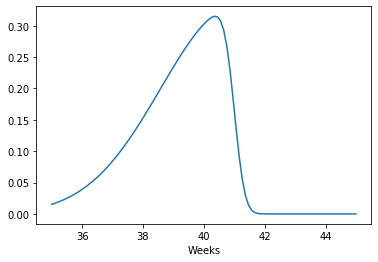

In [21]:
w = np.linspace(35.0, 45.0, 100) 
probMin = scipy.stats.skewnorm.pdf(w, aMin, locMin, scaleMin)
plt.plot(w, probMin)
plt.xlabel("Weeks")